Copyright 2022, The Johns Hopkins University Applied Physics Laboratory LLC

All rights reserved.

Distributed under the terms of the BSD 3-Clause License.

# PyBAMOCS Tutorial

PyBAMOCS uses a simplified box model to simulate the Atlantic meridional overturning circulation (AMOC) simulation, used by [Gnanadesikan et al.](https://journals.ametsoc.org/view/journals/clim/31/22/jcli-d-18-0388.1.xml) to examine the stability of the AMOC. For information about installing PyBAMOCS and the PyBAMOCS API, please see the included [README](../README.md).

This tutorial is meant to be a tool for getting started using the PyBAMOCS package and the included `box_model` functionality, and is not meant to be a comprehensive overview of all functions or capabilities of the included code. For a more thorough understanding, please consider viewing the code itself, and the examples in the [scrips](../scripts) folder.

This tutorial assumes that you have downloaded the PyBAMOCs code from the PACMANs repository on GitHub and installed PyBAMOCS and [Jupyter Notebook](https://jupyter.org) in your Python environment.

In [53]:
import time
from matplotlib import pyplot as plt
from typing import Union

# Import the `box_model` function and its arguments
from pybamocs.box_model import box_model
from pybamocs.box_model import NORTH_IDX, SOUTH_IDX, LOW_IDX, DEEP_IDX
from pybamocs.box_model_args import (
    BoxModelBoxDimensions,
    BoxModelInitConditions,
    BoxModelTimeStep,
    BoxModelParameters
)
from pybamocs.box_model_args import dict_from_box_args, box_args_from_dict

In [4]:
# Box model settings are divided into for groups:
box_model_dimensions = BoxModelBoxDimensions()
box_model_initial_conditions = BoxModelInitConditions()
box_model_time_settings = BoxModelTimeStep()
box_model_parameters = BoxModelParameters()

# And there is one object for each group as shown above.

Notice that no arguments are required to initialize the objects in the previous cell, this is because each argument has a default value. Not passing in a value for an argument sets it to the default value.

The following cells show the default values of each object. For more information about what each argument represents, see [pybamocs.box_model_args.py](../pybamocs/box_model_args.py).

In [16]:
def print_box_model_argument_settings(argument: Union[BoxModelBoxDimensions, BoxModelInitConditions,
                                                      BoxModelTimeStep, BoxModelParameters]) -> None:
    """
    Print box model settings to console for a given box_model argument.
    :param argument: One of the box_model argument objects.
    """
    settings_dict = argument.to_dict()  # Get the settings as a python dictionary

    print("vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv")
    # Print each key, value pair in the dictionary
    for key, value in settings_dict.items():
        print(f"{key}={value}")
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    print()


In [23]:
print("------------------------------------------------------------")
print("Box Dimensions:")
print_box_model_argument_settings(box_model_dimensions)

------------------------------------------------------------
Box Dimensions:
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
area=360000000000000.0
area_low=200000000000000.0
area_s=100000000000000.0
area_n=60000000000000.0
D_high=100
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [22]:
print("------------------------------------------------------------")
print("Initial Conditions")
print_box_model_argument_settings(box_model_initial_conditions)

------------------------------------------------------------
Initial Conditions
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
D_low0=400.0
T_north0=2.0
T_south0=4.0
T_low0=17.0
T_deep0=3.0
S_north0=35.0
S_south0=36.0
S_low0=36.0
S_deep0=34.5
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [21]:
print("------------------------------------------------------------")
print("Model Time Step Parameters:")
print_box_model_argument_settings(box_model_time_settings)

------------------------------------------------------------
Model Time Step Parameters:
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
N=4000
time_step_size_in_years=0.25
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [20]:
print("------------------------------------------------------------")
print("Model Parameters")
print_box_model_argument_settings(box_model_parameters)

------------------------------------------------------------
Model Parameters
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
K_v=1e-05
A_GM=1000.0
M_ek=25000000.0
A_Redi=1000.0
M_SD=15000000.0
Fws=1000000.0
Fwn=50000.0
epsilon=0.00012
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



If preferred, included are helper functions to deal with all settings combined in regular Python dictionaries

In [28]:
print("All box model settings in one dictionary")
print()
box_args_dict = dict_from_box_args(box_model_dimensions, box_model_initial_conditions, box_model_parameters, box_model_time_settings)
print(box_args_dict)

All box model settings in one dictionary

{'area': 360000000000000.0, 'area_low': 200000000000000.0, 'area_s': 100000000000000.0, 'area_n': 60000000000000.0, 'D_high': 100, 'D_low0': 400.0, 'T_north0': 2.0, 'T_south0': 4.0, 'T_low0': 17.0, 'T_deep0': 3.0, 'S_north0': 35.0, 'S_south0': 36.0, 'S_low0': 36.0, 'S_deep0': 34.5, 'K_v': 1e-05, 'A_GM': 1000.0, 'M_ek': 25000000.0, 'A_Redi': 1000.0, 'M_SD': 15000000.0, 'Fws': 1000000.0, 'Fwn': 50000.0, 'epsilon': 0.00012, 'N': 4000, 'time_step_size_in_years': 0.25}


In [32]:
print("Getting box model argument objects from a dictionary")
print()
box_args = box_args_from_dict(box_args_dict)
print([(arg, obj) for arg, obj in box_args.items()])

Getting box model argument objects from a dictionary

[('box_dimensions', <pybamocs.box_model_args.BoxModelBoxDimensions object at 0x7ff1d94a0640>), ('init_conditions', <pybamocs.box_model_args.BoxModelInitConditions object at 0x7ff1d9562ca0>), ('box_params', <pybamocs.box_model_args.BoxModelParameters object at 0x7ff1d9551460>), ('time_step', <pybamocs.box_model_args.BoxModelTimeStep object at 0x7ff1d94cbf40>)]


You can update the parameters in a box model argument object to run a new experiment, or make copies and update those parameters.

In [35]:
new_param_arg = BoxModelParameters(epsilon=0.002)
print('epsilon:', new_param_arg.epsilon)
new_param_arg.epsilon = 0.005
print('updated...')
print('epsilon:', new_param_arg.epsilon)

new_param_arg_copy = new_param_arg.copy()
new_param_arg_copy.epsilon = 100000

print('copied...')

print('same object epsilon:', new_param_arg.epsilon)
print('copied object\'s epsilon after update:', new_param_arg_copy.epsilon)

epsilon: 0.002
updated...
epsilon: 0.005
copied...
same object epsilon: 0.005
copied object's after update epsilon: 100000


## Running a box model simulation

In [43]:
# To run the box model, simply call the `box_model` function with your argument objects
results = box_model(box_model_dimensions, box_model_initial_conditions, box_model_parameters, box_model_time_settings)

# Note that the results are contained in a BoxModelResult object
print("Box model output:")
print(results)
print()

# You can access specific results directly from the object
print("------------------------------------------------------")
print("Shape of M_n:", results.M_n.shape)
print()

# or you can "unpack" them all at once
M_n, M_upw, M_eddy, D_low, T, S, sigma0 = results.unpack()

print("------------------------------------------------------")
print("First 3 values of each output:")
print("M_n:", M_n[:3])
print("M_upw:", M_upw[:3])
print("M_eddy:", M_eddy[:3])
print("D_low:", D_low[:3])
print("T_north:", T[NORTH_IDX, :3])
print("T_south:", T[SOUTH_IDX, :3])
print("T_low:", T[LOW_IDX, :3])
print("T_deep:", T[DEEP_IDX, :3])
print("S_north:", S[NORTH_IDX, :3])
print("S_south:", S[SOUTH_IDX, :3])
print("S_low:", S[LOW_IDX, :3])
print("S_deep:", S[DEEP_IDX, :3])
print("sigma0_north:", sigma0[NORTH_IDX, :3])
print("sigma0_south:", sigma0[SOUTH_IDX, :3])
print("sigma0_low:", sigma0[LOW_IDX, :3])
print("sigma0_deep:", sigma0[DEEP_IDX, :3])

Box model output:

------------------------------------------------------
Shape of M_n: (4000,)

------------------------------------------------------
First 3 values of each output:
M_n: [21477028.72709675 21079480.89969894 20812257.02873391]
M_upw: [5000000.         5001245.50358385 5002293.70599358]
M_eddy: [10000000.          9997509.61318945  9995414.69148277]
D_low: [400.         399.90038453 399.81658766]
T_north: [2.         2.46273224 2.78629748]
T_south: [4.         4.173448   4.29444505]
T_low: [17.         16.94705068 16.89830683]
T_deep: [3.         3.00002853 3.0001507 ]
S_north: [35.         35.02854932 35.05579254]
S_south: [36.         35.9243136  35.85232083]
S_low: [36.         36.00278966 36.00531313]
S_deep: [34.5        34.50031742 34.50062474]
sigma0_north: [1027.97173704 1027.9560741  1027.94929663]
sigma0_south: [1028.58210098 1028.50303197 1028.43244304]
sigma0_low: [1026.28211113 1026.29692278 1026.31050239]
sigma0_deep: [1027.48594718 1027.48619799 1027.4864

Here is an example of how one might visualize the results using the `pyplot` submodule from [Matplotlib](https://matplotlib.org)

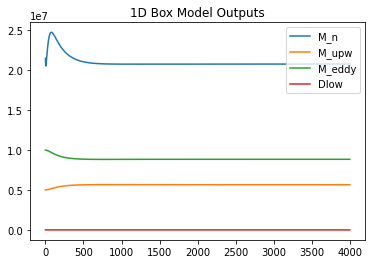

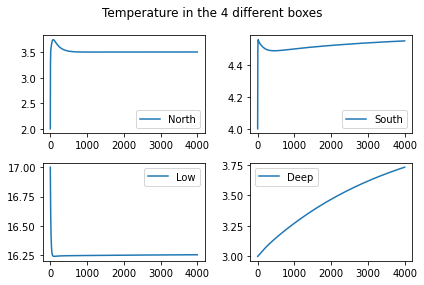

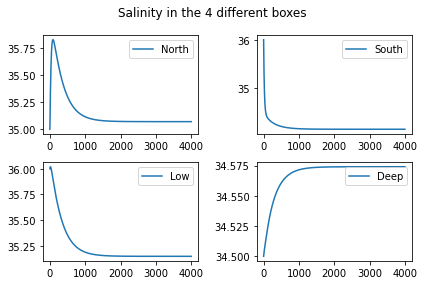

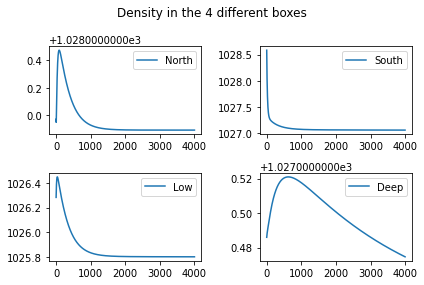

In [47]:
plt.plot(M_n, label='M_n')
plt.plot(M_upw, label='M_upw')
plt.plot(M_eddy, label='M_eddy')
plt.plot(D_low, label='Dlow')
plt.legend()
plt.title("1D Box Model Outputs")
plt.show()
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].plot(T[NORTH_IDX], label='North')
ax[0, 1].plot(T[SOUTH_IDX], label='South')
ax[1, 0].plot(T[LOW_IDX], label='Low')
ax[1, 1].plot(T[DEEP_IDX], label='Deep')
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()
plt.suptitle("Temperature in the 4 different boxes")
plt.tight_layout()
plt.show()
fig1, ax1 = plt.subplots(nrows=2, ncols=2)
ax1[0, 0].plot(S[NORTH_IDX], label='North')
ax1[0, 1].plot(S[SOUTH_IDX], label='South')
ax1[1, 0].plot(S[LOW_IDX], label='Low')
ax1[1, 1].plot(S[DEEP_IDX], label='Deep')
ax1[0, 0].legend()
ax1[0, 1].legend()
ax1[1, 0].legend()
ax1[1, 1].legend()
plt.suptitle("Salinity in the 4 different boxes")
plt.tight_layout()
plt.show()
fig2, ax2 = plt.subplots(nrows=2, ncols=2)
ax2[0, 0].plot(sigma0[NORTH_IDX], label='North')
ax2[0, 1].plot(sigma0[SOUTH_IDX], label='South')
ax2[1, 0].plot(sigma0[LOW_IDX], label='Low')
ax2[1, 1].plot(sigma0[DEEP_IDX], label='Deep')
ax2[0, 0].legend()
ax2[0, 1].legend()
ax2[1, 0].legend()
ax2[1, 1].legend()
plt.suptitle("Density in the 4 different boxes")
plt.tight_layout()
plt.show()

## Running multiple experiments with the box model

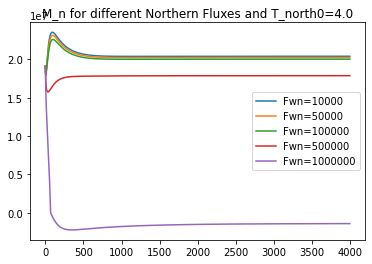

Total time to collect data: 4.946042776107788 seconds


In [56]:
# Consider an example of some data collection

Fwn_values_to_test = [10000, 50000, 100000, 500000, 1000000]
alternate_north_starting_temp = 4.0

box_dims = BoxModelBoxDimensions()
params = BoxModelParameters()
time_step = BoxModelTimeStep()
init = BoxModelInitConditions(T_north0=alternate_north_starting_temp)

# Collect the data... (should take a few seconds)
start_time = time.time()
results = []
for fwn in Fwn_values_to_test:
    params.Fwn = fwn
    results.append(box_model(box_dims, init, params, time_step))
time_to_collect_data = time.time() - start_time

# Let's look at the difference in M_n for each run
plt.figure()
for i in range(len(Fwn_values_to_test)):
    plt.plot(results[i].M_n, label=f"Fwn={Fwn_values_to_test[i]}")
plt.title(f"M_n for different Northern Fluxes and T_north0={alternate_north_starting_temp}")
plt.legend()
plt.show()

print(f"Total time to collect data: {time_to_collect_data} seconds")

Note that collecting data this way is embarrassingly parallel. To more quickly collect data on multiple configurations, consider a simple [multiprocessing](https://docs.python.org/3/library/multiprocessing.html) approach.